In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


Acurácia do modelo: 100.00%

Relatório de classificação:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



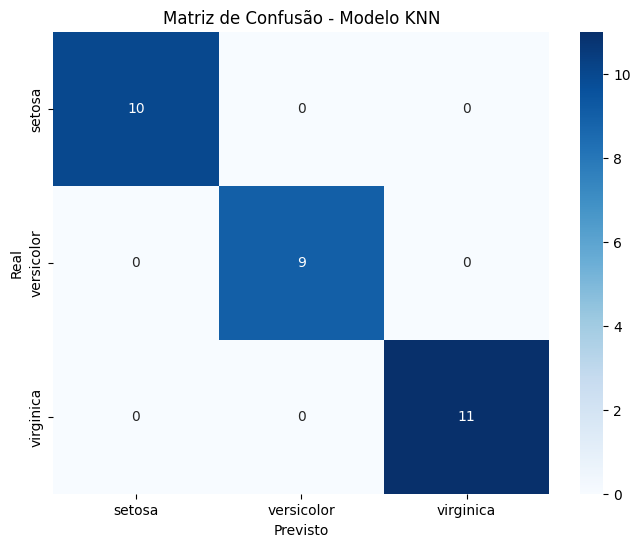

In [7]:
# bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# upando o BD 
flores = load_iris()
dados_flores = flores.data  # Atributos de acordo com BD, sepala e petala etc..
tipos_flores = flores.target  # Tipos setosa, virginica etc..

# Separando os dados para treino e teste
dados_treino, dados_teste, tipos_treino, tipos_teste = train_test_split(
    dados_flores, tipos_flores, test_size=0.2, random_state=42
)

# atribuindo os dados para facilitar o tratamento do objeto
normalizador = StandardScaler()
dados_treino_normalizados = normalizador.fit_transform(dados_treino)
dados_teste_normalizados = normalizador.transform(dados_teste)

#modelo_knn = KNeighborsClassifier(n_neighbors=3)
#modelo_knn.fit(dados_teste_normalizados, tipos_treino) 

# modelo de vizinhos com parametro 3
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn.fit(dados_treino_normalizados, tipos_treino)

# futuras previsões 
previsoes = modelo_knn.predict(dados_teste_normalizados)

# Calculando a porcentagem eu acho
acertos = accuracy_score(tipos_teste, previsoes)
print(f'Acurácia do modelo: {acertos * 100:.2f}%')

# Relatório do modelo
print("\nRelatório de classificação:\n")
print(classification_report(tipos_teste, previsoes, target_names=flores.target_names))

# matriz dizendo os a previsão errou ou acertou
matriz_confusao = confusion_matrix(tipos_teste, previsoes)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=flores.target_names, yticklabels=flores.target_names)
plt.title("Matriz de Confusão - Modelo KNN")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()
